# Project 6: Titanic Dataset Analysis
## Author: Brennan Lehman
## Date: 02/08/2024

## Overview
The Titantic dataset contains information of the passengers of the titanic. In this project we will be using the data to look at survival rates among the passengers.Perform and publish a custom EDA project to demnostrate skills with Jupyter, pandas, Seaborn and popular tools for data analytics. The notebook should tell a data story and visually present findings in a clear and engaging manner. 

In [70]:
# Import dependencies:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [71]:
# Load the dataset into a pandas DataFrame 
df = sns.load_dataset('titanic')

# Inspect first rows of the DataFrame
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [72]:
# Initial Data Inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [73]:
# Inital descriptive statistics
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


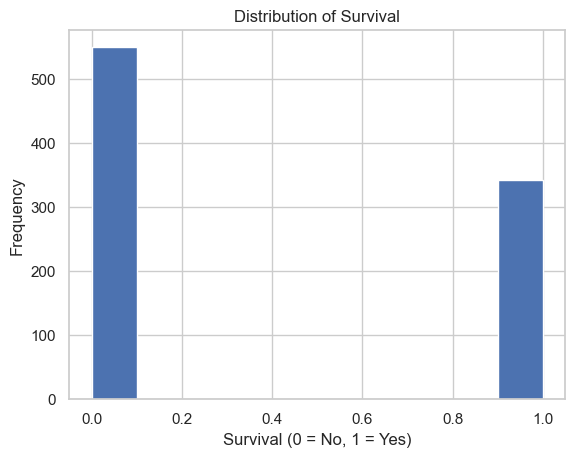

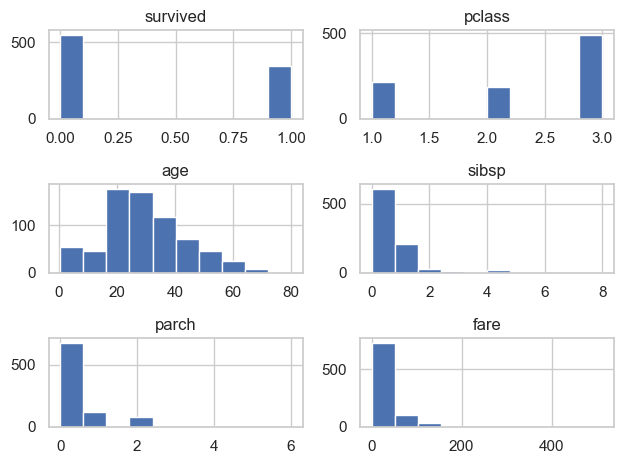

In [74]:
# Initial Data Distribution for Numerical Columns

# Inspect histogram by numerical column
df['survived'].hist()
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.title('Distribution of Survival')

# Inspect histograms for all numerical columns
df.hist()

# Function to help with not overlapping of subplots
plt.tight_layout()

# Show all plots
plt.show()

### _Historgram Analysis_
Unfortunately the data confirms what we already know, many more passengers of the Titantic died than survived. It is interesting looking at the distribution of passengers. The approximate average age was 30's, there were a few siblings on board, and the majority of passengers were in 3rd class.  

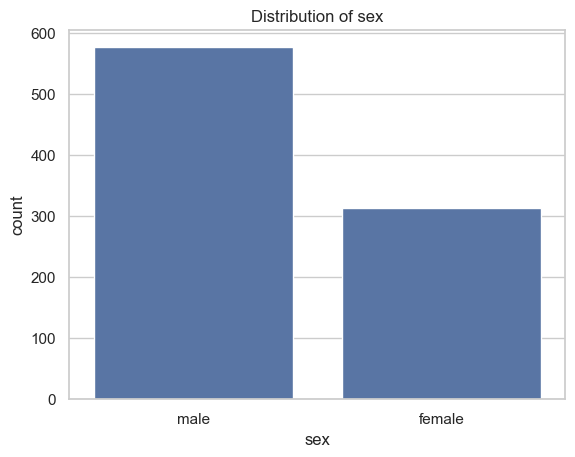

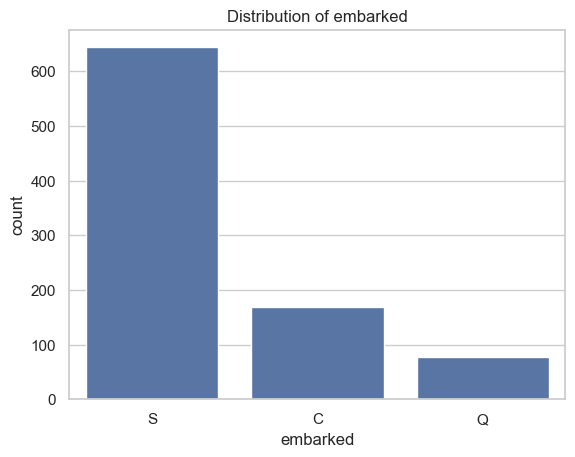

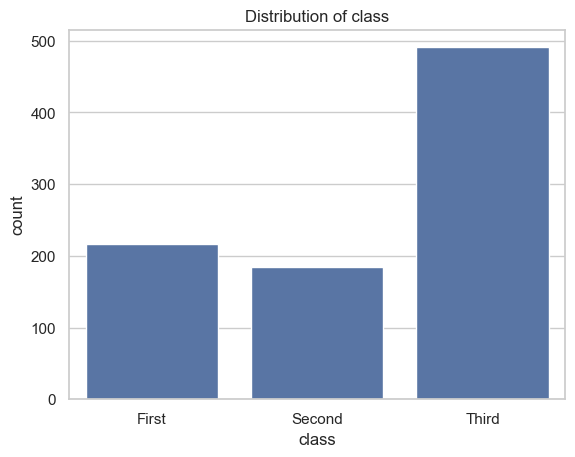

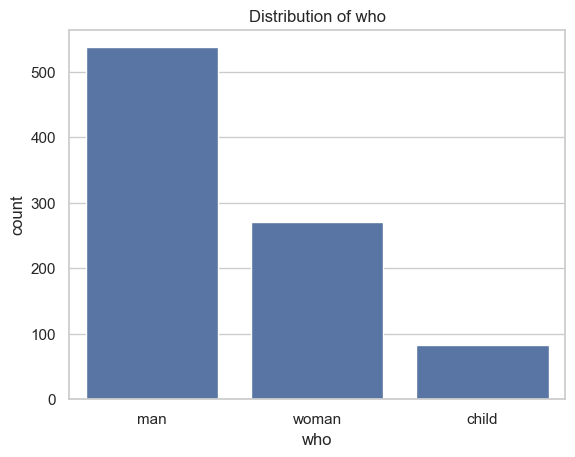

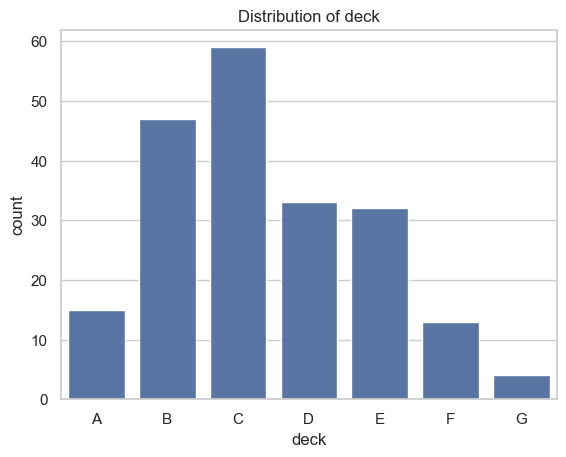

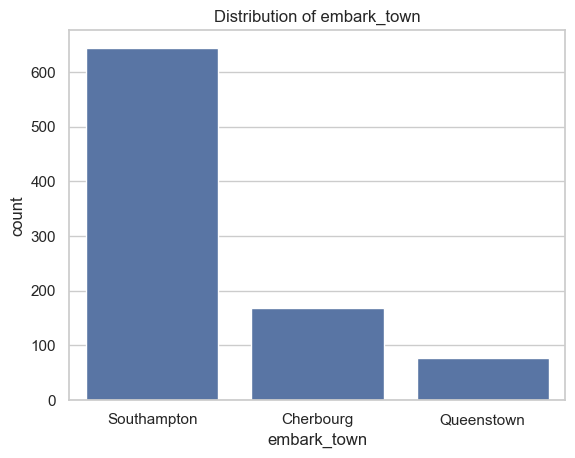

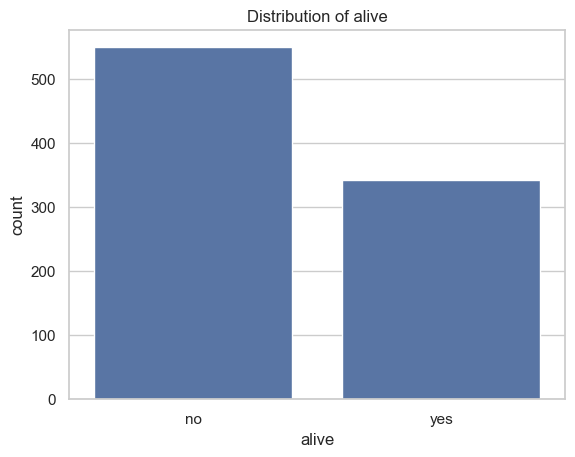

In [75]:
# Initial Data Distribution for Categorical Columns

# Inspect value counts by categorical column
df['who'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### _Categorical Column Analysis_
Looking at the 'who' category, the majority embarked from South Hampton. The majority of passengers were male, in third class, on C deck. 

In [76]:
# Renaming Column
# Function to rename a column
def rename_column(df, old_column, new_column):
    df = df.rename(columns={old_column: new_column})
    return df

# Rename the 'sibsp' column to 'siblings_spouses_aboard'
df = rename_column(df, 'sibsp', 'siblings_spouses_aboard')

print(df.dtypes)

survived                      int64
pclass                        int64
sex                          object
age                         float64
siblings_spouses_aboard       int64
parch                         int64
fare                        float64
embarked                     object
class                      category
who                          object
adult_male                     bool
deck                       category
embark_town                  object
alive                        object
alone                          bool
dtype: object


### _Renaming columns_
 
In the above function I renamed the column 'sibsp' to 'siblings_spouses_aboard' which in all reality is probably too long, but it is more descriptive for our readers. 

In [77]:
# Insert a new column

# Insert a new column 'new_column' with dummy values
df['first_time_passenger'] = 'yes'

# Print the DataFrame to verify the new column
print(df.head())

   survived  pclass     sex   age  siblings_spouses_aboard  parch     fare  \
0         0       3    male  22.0                        1      0   7.2500   
1         1       1  female  38.0                        1      0  71.2833   
2         1       3  female  26.0                        0      0   7.9250   
3         1       1  female  35.0                        1      0  53.1000   
4         0       3    male  35.0                        0      0   8.0500   

  embarked  class    who  adult_male deck  embark_town alive  alone  \
0        S  Third    man        True  NaN  Southampton    no  False   
1        C  First  woman       False    C    Cherbourg   yes  False   
2        S  Third  woman       False  NaN  Southampton   yes   True   
3        S  First  woman       False    C  Southampton   yes  False   
4        S  Third    man        True  NaN  Southampton    no   True   

  first_time_passenger  
0                  yes  
1                  yes  
2                  yes  
3   

### _Insert a column_

In this example we added a new column to represent whether or not it was a passengers first time cruising. Also, worth noting, the renamed column 'siblings_spouses_aboard' is also present in this chart.

# Deep dives into titantic data set

## Goal 1. I believe that we will see a correlation amongst passenger class and survival rates. 
- I plan to use a bar plot chart for to pursue this hypothesis

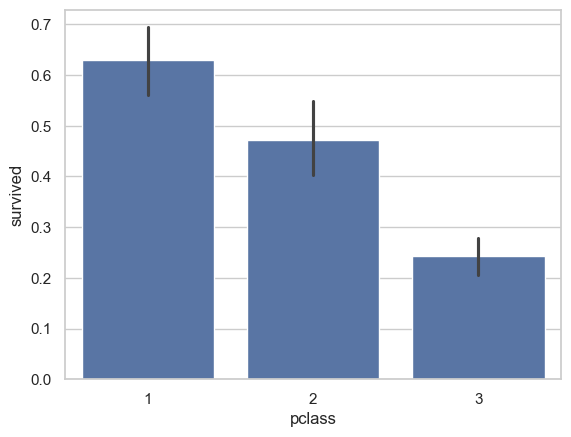

In [78]:
# Barplot of Survival by Passenger Class
sns.barplot(x="pclass", y="survived", data=df);

### Analysis of barplot
- 1st class passengers highest survival rates
- 3rd class passengers lowest survival rates
- Goal 1 was confirmed, there was a definite correlation between passenger class and survival

## Goal 2. Females were more likely to survive than males

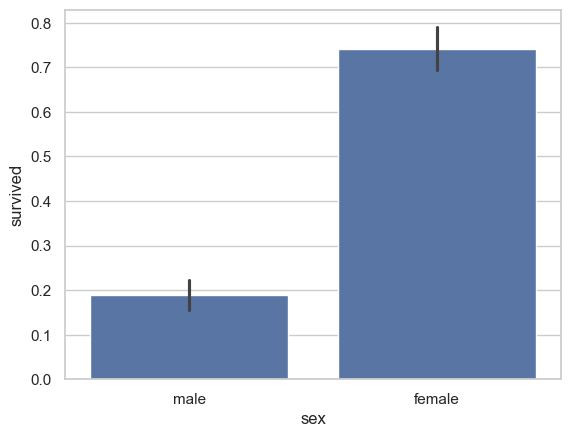

In [79]:
# Barplot of Survival by Passenger Class
sns.barplot(x="sex", y="survived", data=df);

### Analysis of barplot 
- Females survived at a much higher rate vs. males.

## Goal 3. I want to show the ages of the passengers to get a feel for who was on board visually.
- I will use a pie chart to visaulize

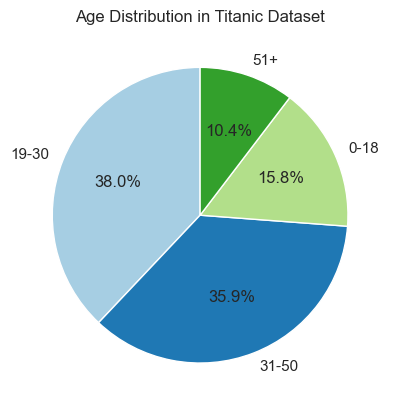

In [80]:
# Define age categories 
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']

# Create a pie chart
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Age Distribution in Titanic Dataset')
plt.show()

### Analysis of age distribution:
- Largest age group was 19-30 year olds
- Smallest age group was 51+
- I was a little shocked that there were more young children vs. 51+

## Goal 4. Continuing the deep dive of information, I would like to look for a correlation between age, passenger class, and survivorship. 
-I will be using a scatter plot to visualize

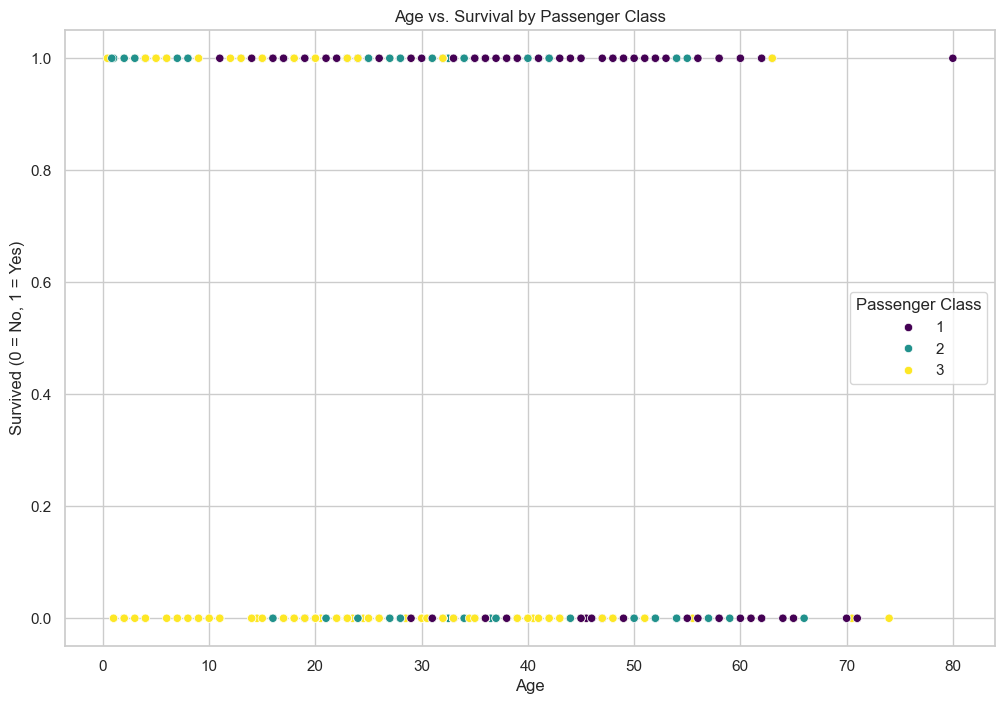

In [81]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with hue encoding for passenger class and survival status
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='age', y='survived', hue='pclass', data=df_age_notnull, palette='viridis', alpha=1)

# Customize the plot
plt.title('Age vs. Survival by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.legend(title='Passenger Class')

# Show the plot
plt.show()

### Analysis of relationship between age, passenger class, and survivorship
- 3rd class passengers unfortunately parished among all age groups, according to data it does look like they tried to save little ones and older lives from 3rd class.
- Looks like the oldest passenger was a 1st class passenger that survived. 
- Middle age survivors were dominated by 1st class passengers.

# Executive findings:
The titantic data set analysis revealed some interesting findings. I spent the majority of my deep dive analysis looking into age, class (social status), and survival. I did not dive into fare analysis or port of embarkment so there is potential for additional future research there. 
Key points of interest:
- Social status dictated probability of survival, 1st class passengers survived at a much higher rate.
- The largest age group on the 19-30, with the majority being male. 
- Youth and elderly also survived at a higher rate. No 1st class youth perished.
- 3rd class passengers were most likely not going to survive, especially if midle aged male. 